<a href="https://colab.research.google.com/github/priyadarshinivr19/Minors-Degree-Machine-Learning/blob/main/FMML_M4L4_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Support Vector Machines**

In [1]:
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

import pandas
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import matplotlib.pyplot as plt


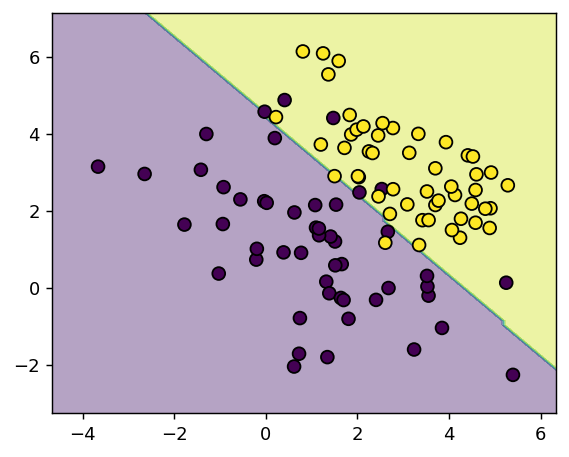

In [2]:
np.random.seed(0)

ar = np.vstack(     [\
                    np.random.multivariate_normal(np.array([1, 1]), 1.5 * np.array([[2, -1], [-1, 2.0]]), size = 50, ),\
                    np.random.multivariate_normal(np.array([3, 3]), 2 * np.array([[0.75, -0.5], [-0.5, 0.75]]), size = 50, )
                    ]\
              )

testAr = np.vstack(   [\
                      np.random.multivariate_normal(np.array([1, 1]), np.array([[0.5, -0.25], [-0.25, 0.5]]), size = 500, ),\
                      np.random.multivariate_normal(np.array([3, 3]), np.array([[0.75, -0.5], [-0.5, 0.75]]), size = 500, )
                      ]\
                  )
testy = np.array([0] * int((testAr.shape[0]/2)) + [1] * int((testAr.shape[0]/2)))

X = ar
y = np.array([0] * int((ar.shape[0]/2)) + [1] * int((ar.shape[0]/2)))

def plotDecisionBoundary(X, y, pair, clf):
  x_min, x_max = X[:, pair[0]].min() - 1, X[:, pair[0]].max() + 1
  y_min, y_max = X[:, pair[1]].min() - 1, X[:, pair[1]].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                      np.arange(y_min, y_max, 0.1))

  y_pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  y_pred = y_pred.reshape(xx.shape)
  plt.figure(figsize=(5,4))
  plt.contourf(xx, yy, y_pred, alpha=0.4)
  plt.scatter(X[:, pair[0]], X[:, pair[1]], c = y, s = 50, edgecolor='k')
  # plt.legend()
  plt.gcf().set_dpi(130)
  plt.show()

def boundaryExp() :
  clf = svm.LinearSVC()
  pair = [0, 1]
  clf.fit(X[:, pair], y)
  plotDecisionBoundary(X, y, pair, clf)

  plt.show()

boundaryExp()

In [3]:
iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
irisData = pandas.DataFrame(\
    data = np.hstack((X,y.reshape(y.shape[0], 1), [[iris["target_names"][int(classIdx)]] for classIdx in y])), \
    columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', "Class", "ClassName"])
irisData.sample(n = 10, random_state = 1)

,sepal_length,sepal_width,petal_length,petal_width,Class,ClassName
14,5.8,4.0,1.2,0.2,0,setosa
98,5.1,2.5,3.0,1.1,1,versicolor
75,6.6,3.0,4.4,1.4,1,versicolor
16,5.4,3.9,1.3,0.4,0,setosa
131,7.9,3.8,6.4,2.0,2,virginica
56,6.3,3.3,4.7,1.6,1,versicolor
141,6.9,3.1,5.1,2.3,2,virginica
44,5.1,3.8,1.9,0.4,0,setosa
29,4.7,3.2,1.6,0.2,0,setosa
120,6.9,3.2,5.7,2.3,2,virginica


Accuracy of the decision tree on the test set: 

0.921


The confusion matrix is : 


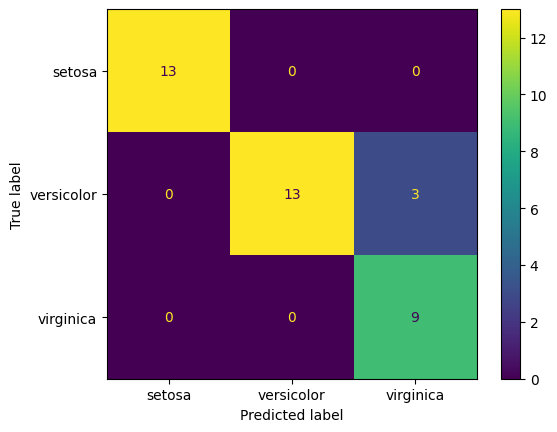

In [4]:
clf = svm.LinearSVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy of the decision tree on the test set: \n\n{:.3f}\n\n".format(accuracy_score(y_pred, y_test)))
class_names = iris["target_names"]
print("The confusion matrix is : ")
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='viridis', values_format='.0f')

plt.show()

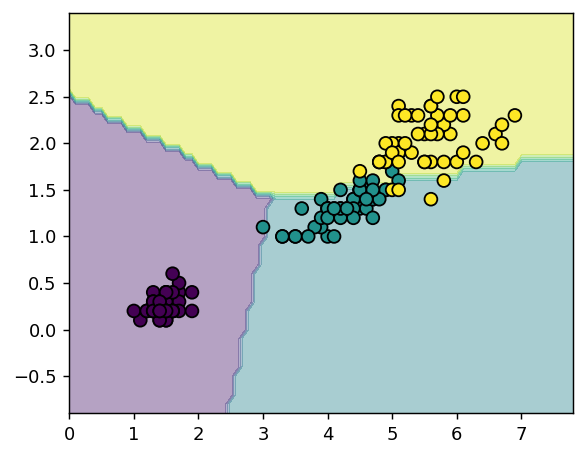

In [5]:
clf = svm.LinearSVC()
pair = [2, 3]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, [2, 3], clf)

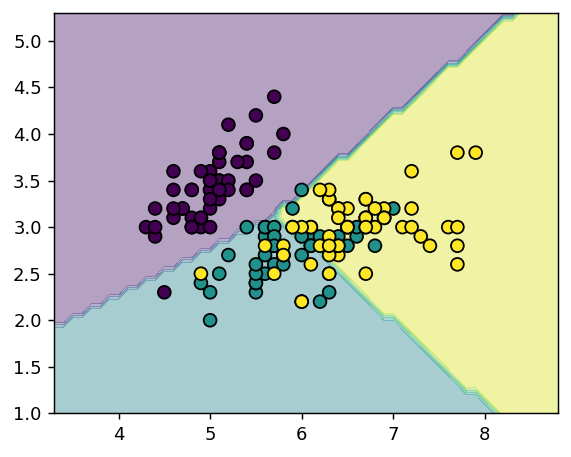

In [6]:
clf = svm.LinearSVC()
pair = [0, 1]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, pair, clf)

Kernel Trick

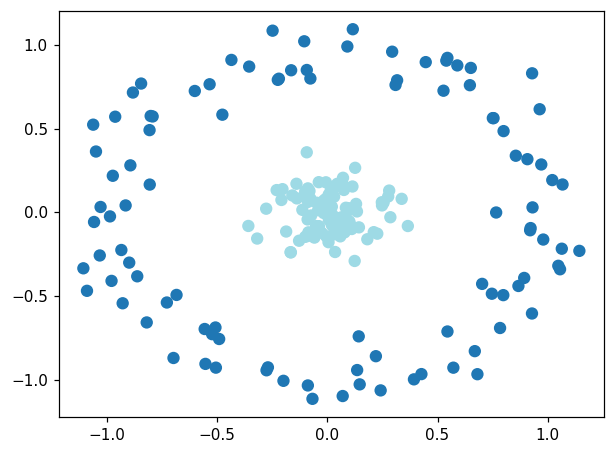

In [7]:
from sklearn.datasets import make_circles
X, y = make_circles(200, factor=.1, noise=.1)

clf = svm.SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='tab20')
plt.gcf().set_dpi(110)

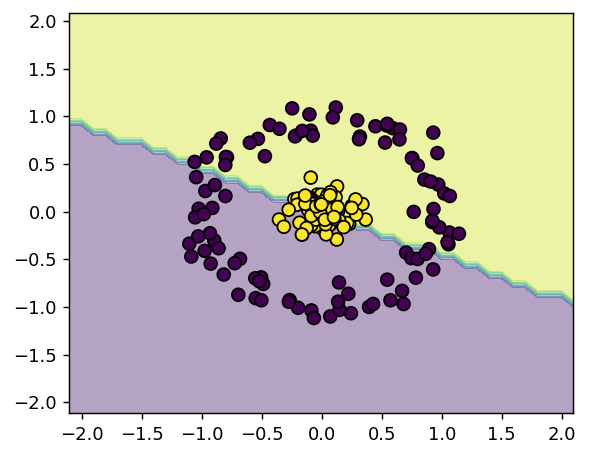

In [8]:
plt.style.use("default")
clf = svm.LinearSVC()
pair = [0, 1]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, [0, 1], clf)

In [9]:
Z = np.array([[i[0]**2 + i[1]**2] for i in X])

In [10]:
X_new = np.hstack((X, Z))

In [11]:
import plotly.graph_objects as go


In [12]:
fig = go.Figure(data = [go.Scatter3d(
    x = X_new[:, 0],
    y = X_new[:, 1],
    z = X_new[:, 2],
    mode = "markers",
    marker = {
        "color" : y,
        "line": {"width" : 4, "color":'DarkSlateGrey'},
        "colorscale": "viridis"},
)])

fig.show()

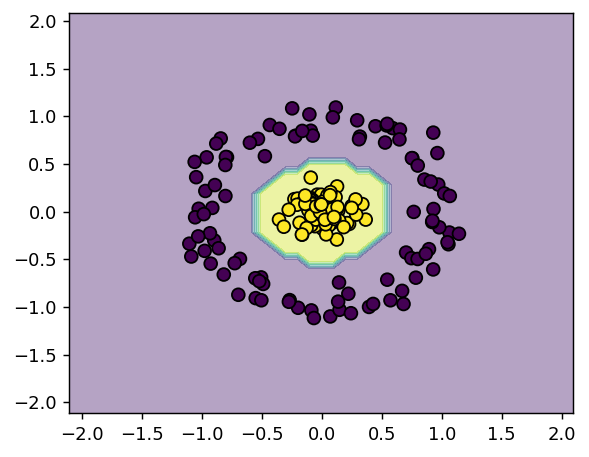

In [13]:
plt.style.use("default")
clf = svm.SVC()
pair = [0, 1]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, [0, 1], clf)

Accuracy of the decision tree on the test set: 

0.974


The confusion matrix is : 


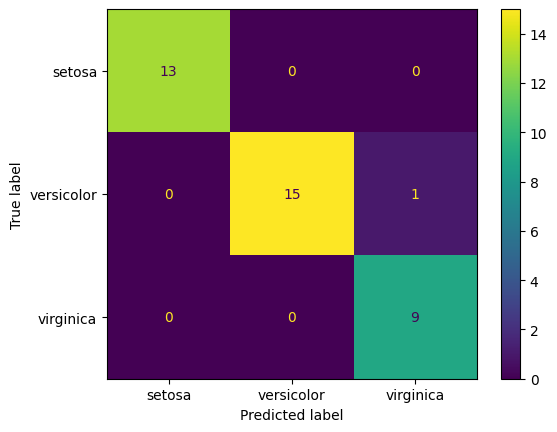

In [14]:
iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
clf = svm.SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy of the decision tree on the test set: \n\n{:.3f}\n\n".format(accuracy_score(y_pred, y_test)))
class_names = iris["target_names"]
print("The confusion matrix is : ")
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='viridis', values_format='.0f')

plt.show()

**Questions Set 1**

**Try to run the same experiment after filtering different features, 2 at a time.**
**Using different kinds of kernels for the SVM among: {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}**

In [17]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernels:
    clf = SVC(kernel=kernel, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"Kernel: {kernel}")
    print(classification_report(y_test, y_pred))


Kernel: linear
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38

Kernel: poly
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38

Kernel: rbf
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



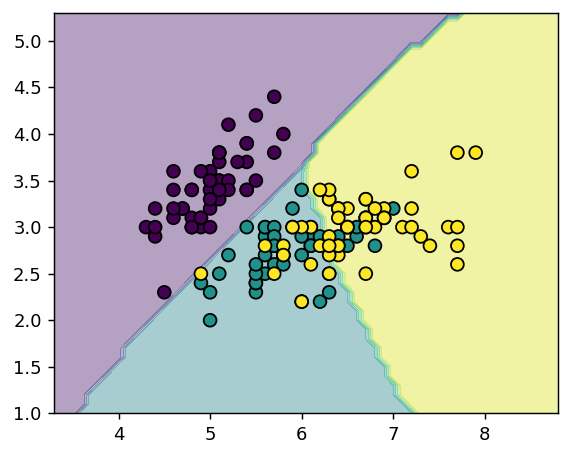

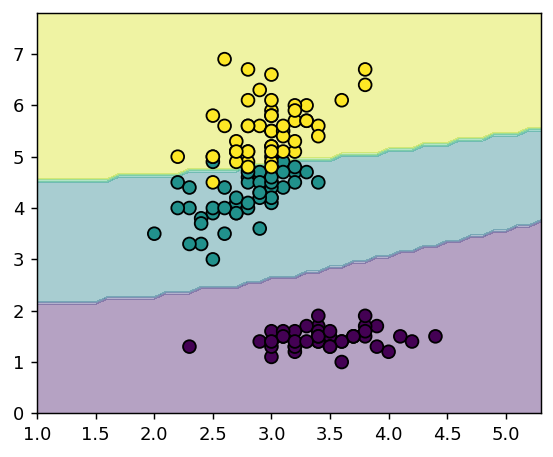

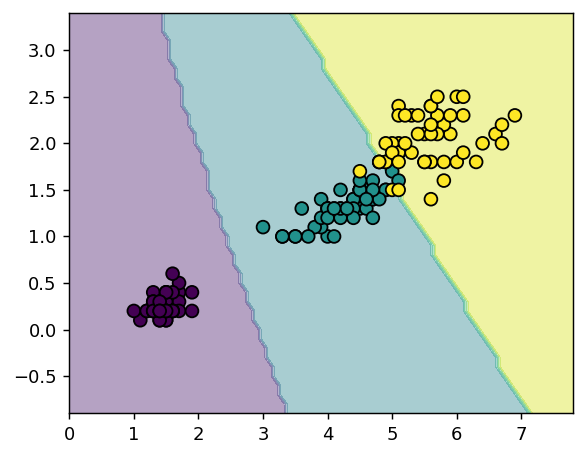

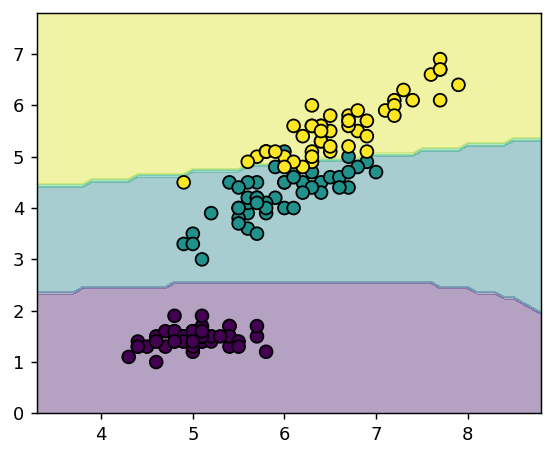

In [18]:
feature_pairs = [(0, 1), (1, 2), (2, 3), (0, 2)]
for pair in feature_pairs:
    clf = svm.SVC(kernel='rbf')
    clf.fit(X[:, pair], y)
    plotDecisionBoundary(X, y, pair, clf)


**Questions Set 2**

**Consider	a	2-class	classification	problem	in	a	2-dimensional	feature	space	x=[x1,	x2]	with	target	variable	y=±1.	The	training	data	comprises	7**
**samples	as	shown	in	figure (4	black	diamonds	for	the	positive	class	and	3	white	diamonds	for	the	negative	class). The	“maximum	margin	classifier”**
**(also	called	linear	“hard	margin”	SVM)	is	a	classifier	that	leaves	the	largest	possible	margin	on	either	side	of	the	decision	boundary.	The	samples	lying	on	the	margin	are	called	support	vectors.**

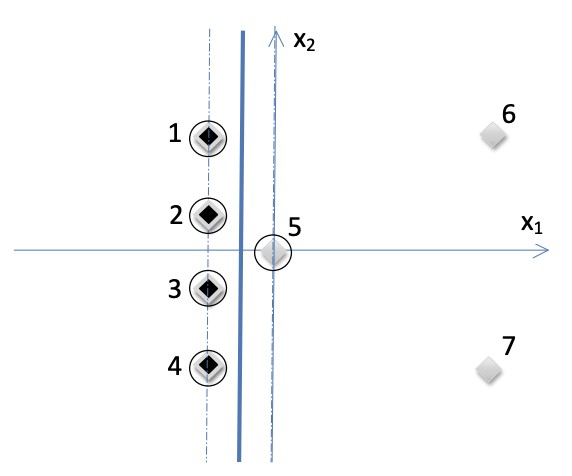




**1. Draw	the	decision	boundary	obtained	by	the	linear	hard
margin	SVM	method	with	a	thick	solid	line.	Draw	the	margins	on	either	side with	thinner dashed	lines.	Identify	the	support	vectors.**




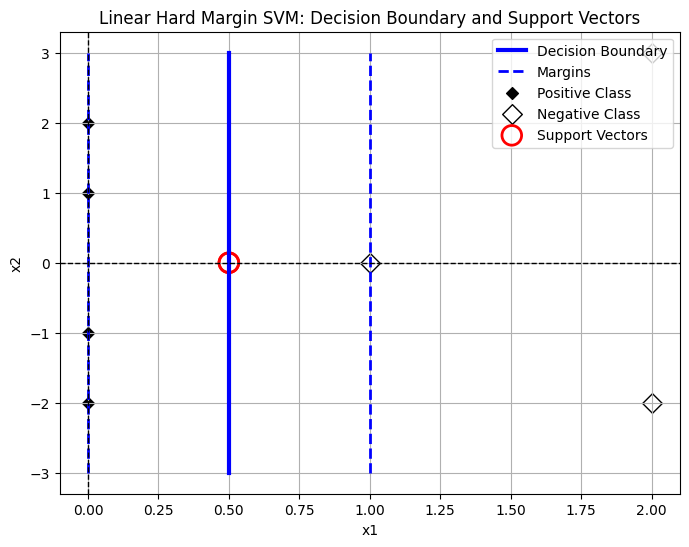

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Sample positions
positive_class = np.array([[0, 2], [0, 1], [0, -1], [0, -2]])  # Positive class (black diamonds)
negative_class = np.array([[1, 0], [2, 3], [2, -2]])           # Negative class (white diamonds)

# Decision boundary and margins
decision_boundary_x = [0.5, 0.5]
margin1_x = [1.0, 1.0]
margin2_x = [0.0, 0.0]
y_range = [-3, 3]

# Plot the data
plt.figure(figsize=(8, 6))

# Plot decision boundary and margins
plt.plot(decision_boundary_x, y_range, 'b-', linewidth=3, label="Decision Boundary")
plt.plot(margin1_x, y_range, 'b--', linewidth=2, label="Margins")
plt.plot(margin2_x, y_range, 'b--', linewidth=2)

# Plot data points
plt.scatter(positive_class[:, 0], positive_class[:, 1], color='black', marker='D', label="Positive Class")
plt.scatter(negative_class[:, 0], negative_class[:, 1], color='white', edgecolors='black', marker='D', s=100, label="Negative Class")

# Highlight support vectors
plt.scatter([0.5, 0.5], [0, 0], s=200, facecolors='none', edgecolors='red', linewidths=2, label="Support Vectors")

# Configure the plot
plt.axhline(0, color='k', linestyle='--', linewidth=1)
plt.axvline(0, color='k', linestyle='--', linewidth=1)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Linear Hard Margin SVM: Decision Boundary and Support Vectors")
plt.legend()
plt.grid()
plt.show()


**2. What	is	the	training	error	rate?**

Zero Percent

**3. The	removal	of	which	sample	will	change	the	decision	boundary?**

If sample 2 or sample 5 is removed, the decision boundary will change because these points define the margins and the hyperplane.

**4. What	is	the	leave-one-out	error	rate?**

The leave-one-out error rate is determined by the support vectors. Since there are 2 support vectors out of 7 samples:

LOO Error Rate
=
28.6
%
